# Quadrat Analysis Visualization

## 5.0. Load Packages

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## 5.1 Prepare Data

#### We will only be focusing on Boston data, so the following code will prpare a dataset containing all of the businesses in Boston.

In [12]:
# Filtering out unneccessary columns and rows
data = pd.read_csv('all_counts_norm_formaps.csv')
data = data[data['state'] == 'MA']
data = data[['business_id', 'latitude', 'longitude', 'family', 'romantic', 'friendship', 'professional', 'is_active', 'is_beautysvc', 'is_food', 'is_hotelstravel', 'is_nightlife', 'is_restaurants', 'is_shopping']]

In [13]:
# Getting the category type and most frequent relationship type for each business
def get_category(row):
    true_columns = [col for col in data.columns[7:] if row[col]]
    return true_columns[0] if true_columns else 'other'

data['category'] = data.apply(get_category, axis=1)

data['relationship'] = data[['family', 'romantic', 'friendship', 'professional']].idxmax(axis=1) # returns the relationship type with the highest count for that business

data = data[['business_id', 'latitude', 'longitude', 'category', 'relationship']]

## 5.2 Create Visualizations

### Spatial Distribution by Business Category

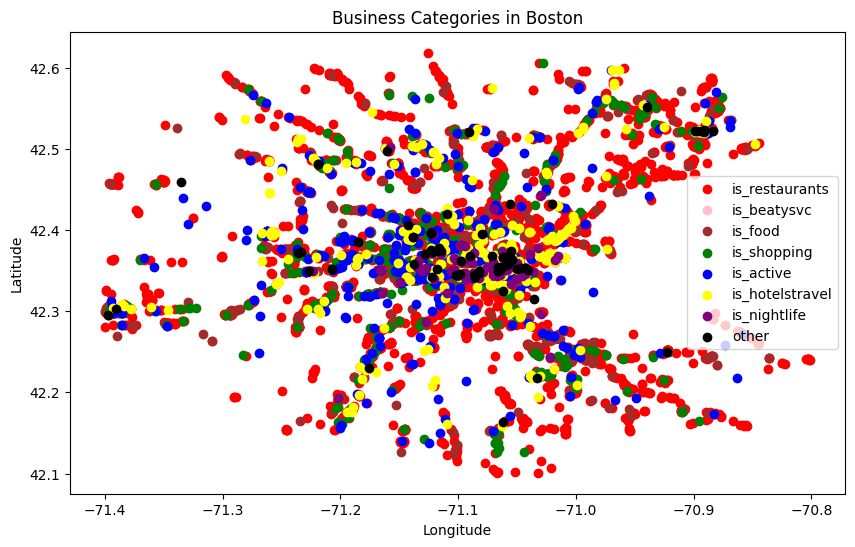

In [14]:
# Create the color legend dictionary for the graph
colors = {'is_restaurants': 'red', 'is_beatysvc': 'pink', 'is_food': 'brown', 'is_shopping': 'green', 'is_active': 'blue', 'is_hotelstravel': 'yellow', 'is_nightlife': 'purple', 'other': 'black'}

# Set up figure configurations
plt.figure(figsize=(10, 6))

# Map the categories to the colors and plot the graph
for category, color in colors.items():
    category_type_df = data[data['category'] == category]
    plt.scatter(category_type_df['longitude'], category_type_df['latitude'], label=category, color=color)

plt.title('Business Categories in Boston')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()

plt.show()

### Spatial Distribution by Relationship Type

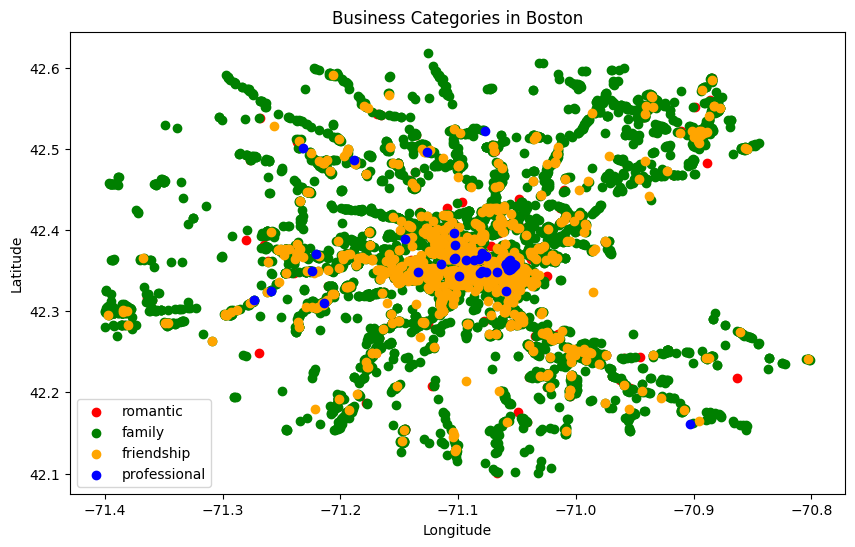

In [15]:
# Create the color legend dictionary for the graph
colors = {'romantic': 'red', 'family': 'green', 'friendship': 'orange', 'professional': 'blue'}

# Set up figure configurations
plt.figure(figsize=(10, 6))

# Map the relationships to the colors and plot the graph
for relationship, color in colors.items():
    relationship_type_df = data[data['relationship'] == relationship]
    plt.scatter(relationship_type_df['longitude'], relationship_type_df['latitude'], label=relationship, color=color)

plt.title('Business Categories in Boston')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()

plt.show()

## Quadrat Maps with Counts

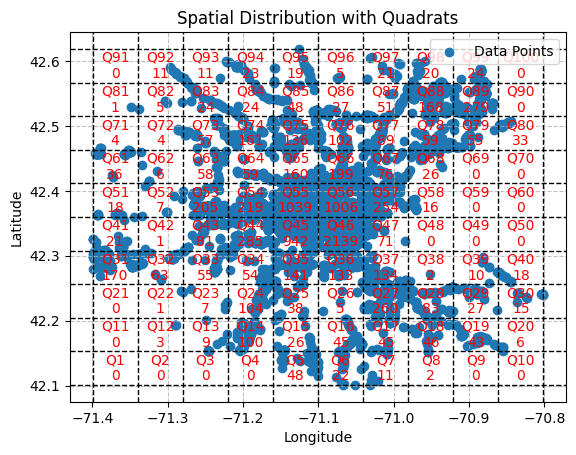

In [18]:
# All data points

# Define the number of quadrats
num_quadrats_x = 10
num_quadrats_y = 10

# Perform quadrat analysis
quadrat_counts, latitude_edges, longitude_edges = np.histogram2d(
    data['latitude'], data['longitude'], bins=[num_quadrats_x, num_quadrats_y]
)
plt.scatter(data['longitude'], data['latitude'], marker='o', label='Data Points')
plt.title('Spatial Distribution with Quadrats')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.8)

# Display quadrats
for x in latitude_edges:
    plt.axhline(x, color='black', linestyle='--', linewidth=1)

for y in longitude_edges:
    plt.axvline(y, color='black', linestyle='--', linewidth=1)

# Annotate quadrat counts
for i in range(num_quadrats_x):
    for j in range(num_quadrats_y):
        count = int(quadrat_counts[i, j])
        plt.text(
            longitude_edges[j] + (longitude_edges[j + 1] - longitude_edges[j]) / 2,
            latitude_edges[i] + (latitude_edges[i + 1] - latitude_edges[i]) / 2,
            f'Q{i * num_quadrats_y + j + 1}\n{count}',
            ha='center',
            va='center',
            color='red'
        )

plt.show()

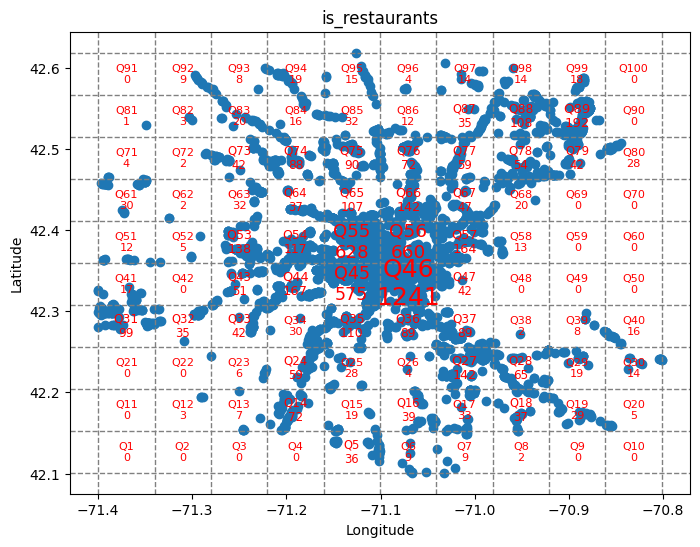

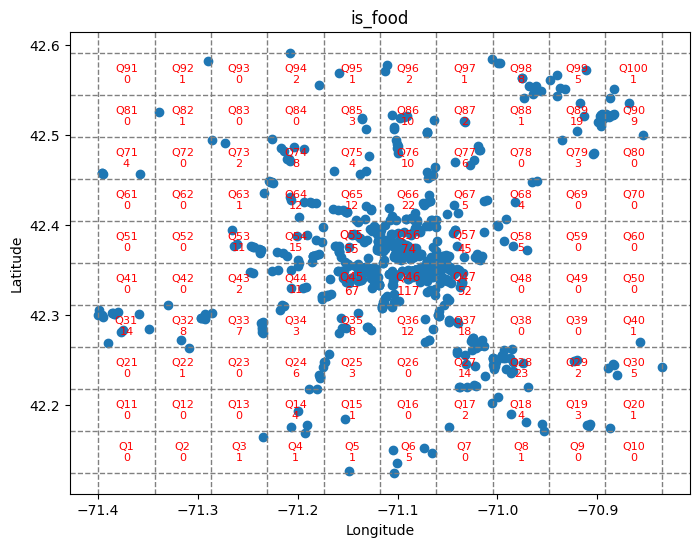

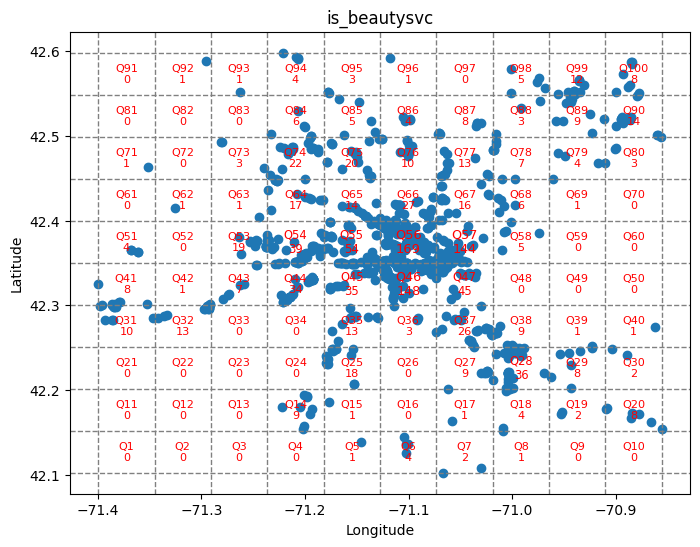

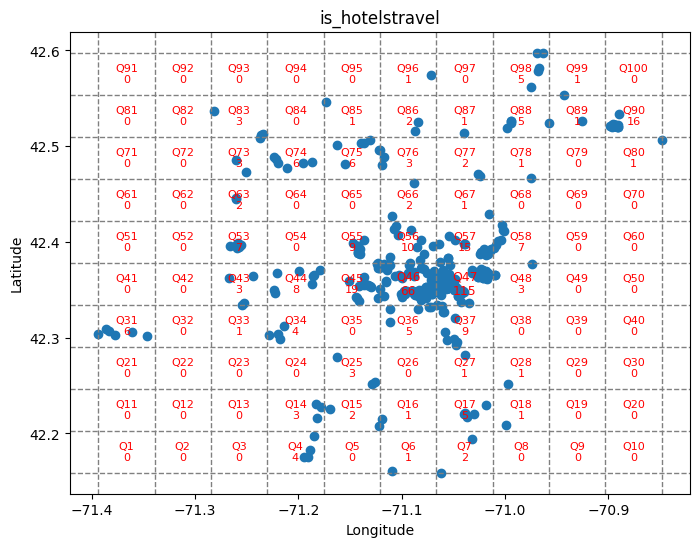

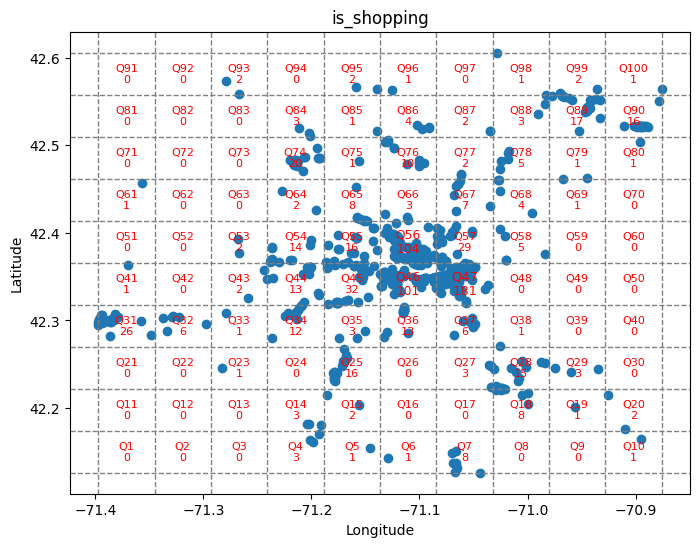

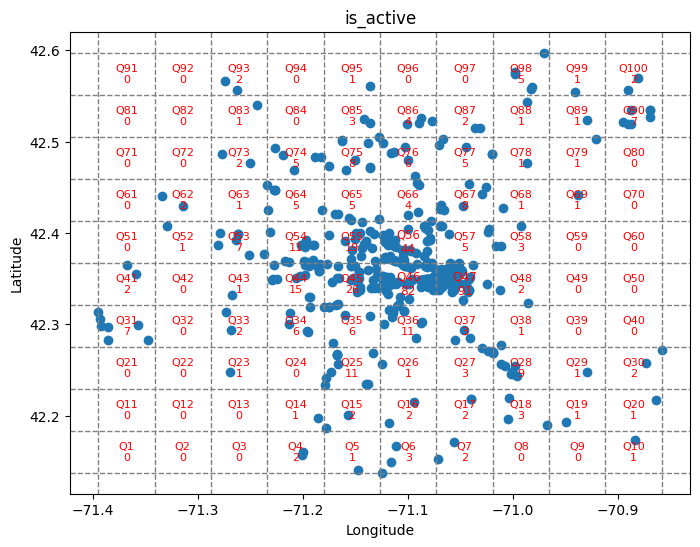

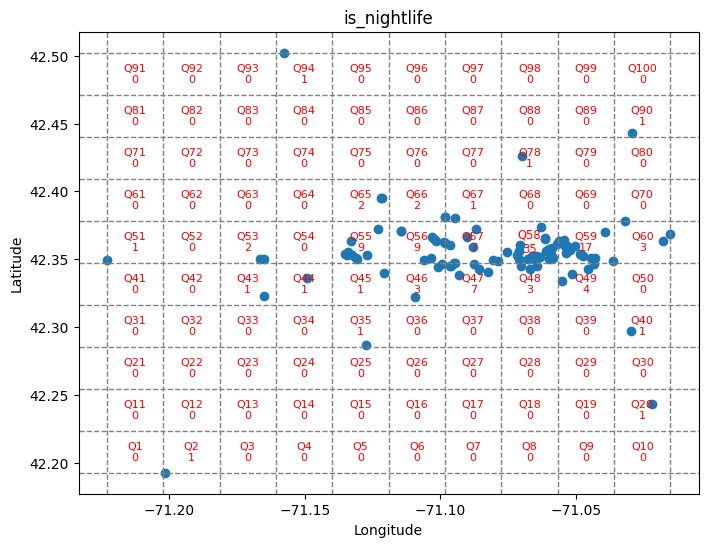

In [19]:
# By Business Category

# Define the number of quadrats
num_quadrats_x = 10
num_quadrats_y = 10

# Calculate the maximum count across all categories
max_count = 0
for category in data['category'].unique():
    df_category = data[data['category'] == category]

    # Perform quadrat analysis for the current category
    quadrat_counts, _, _ = np.histogram2d(
        df_category['latitude'], df_category['longitude'], bins=[num_quadrats_x, num_quadrats_y]
    )
    max_count = max(max_count, quadrat_counts.max())

# Create separate plots for each category
for category in data['category'].unique():
    if category == 'other':
        continue
    df_category = data[data['category'] == category]

    # Perform quadrat analysis for the current category
    quadrat_counts, latitude_edges, longitude_edges = np.histogram2d(
        df_category['latitude'], df_category['longitude'], bins=[num_quadrats_x, num_quadrats_y]
    )

    # Create a scatter plot
    plt.figure(figsize=(8, 6))
    plt.scatter(df_category['longitude'], df_category['latitude'], marker='o', label='Data Points')

    # Display quadrats on the plot using the same quadrat lines
    for i in range(num_quadrats_x):
        for j in range(num_quadrats_y):
            count = int(quadrat_counts[i, j])

            plt.text(
                longitude_edges[j] + (longitude_edges[j + 1] - longitude_edges[j]) / 2,
                latitude_edges[i] + (latitude_edges[i + 1] - latitude_edges[i]) / 2,
                f'Q{i * num_quadrats_y + j + 1}\n{count}',
                ha='center',
                va='center',
                color='red',
                fontsize=8 + 10 * count / max_count  # Adjust fontsize based on count
            )

    # Draw grid lines using the same quadrat lines
    for i in range(num_quadrats_x + 1):
        plt.axvline(longitude_edges[i], color='gray', linestyle='--', linewidth=1)

    for j in range(num_quadrats_y + 1):
        plt.axhline(latitude_edges[j], color='gray', linestyle='--', linewidth=1)

    plt.title(f"{category}")
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.show()


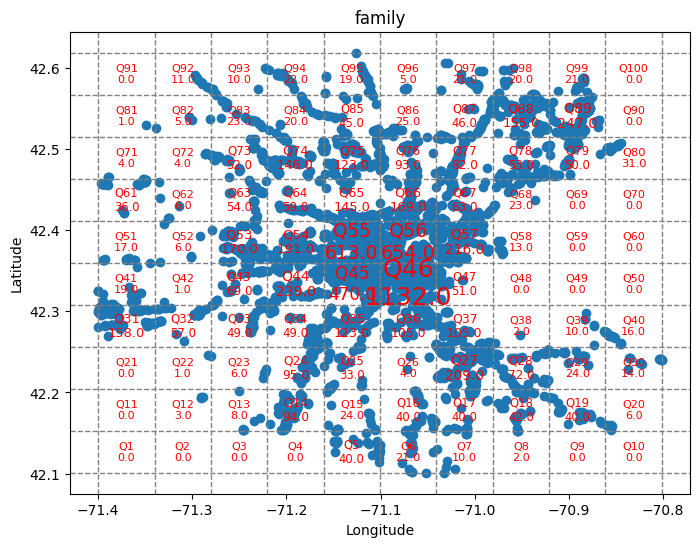

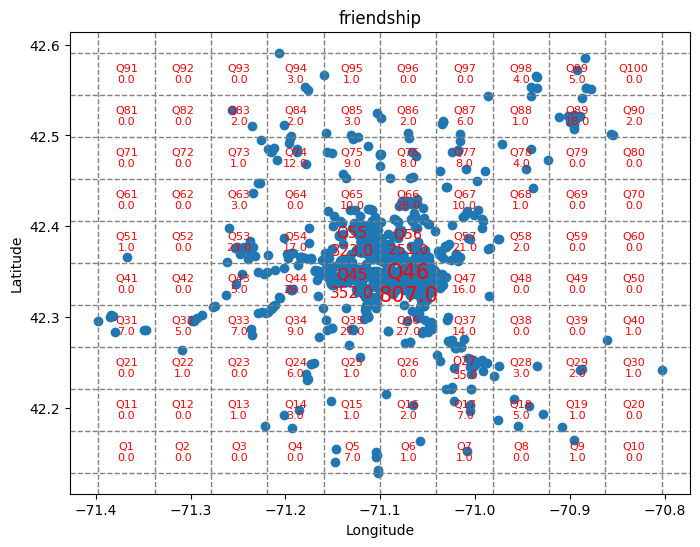

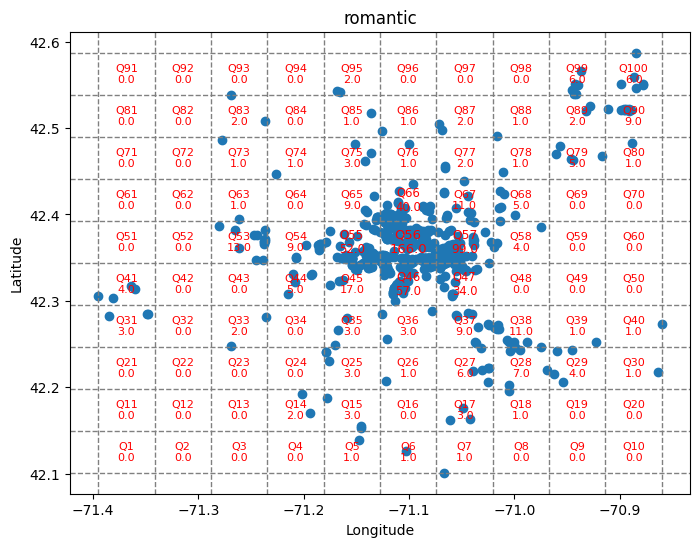

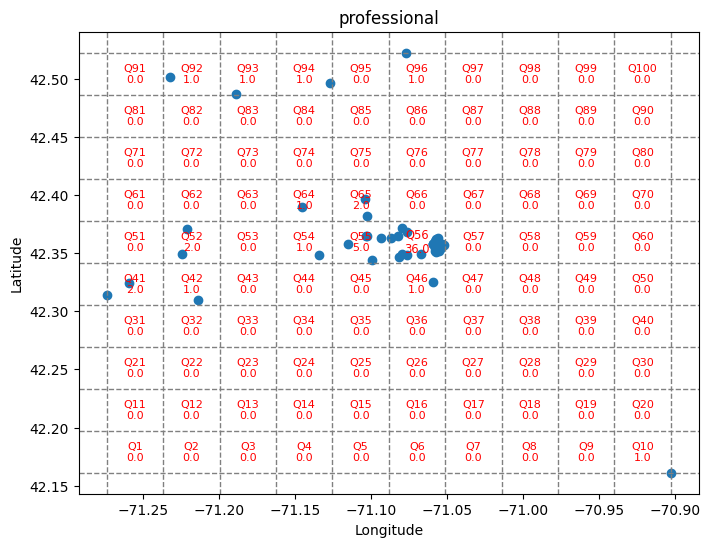

In [11]:
# By Relationship Type

# Define the number of quadrats
num_quadrats_x = 10
num_quadrats_y = 10

# Calculate the maximum count across all relationships
max_count = 0
for relationship in data['relationship'].unique():
    df_relationship = data[data['relationship'] == relationship]

    # Perform quadrat analysis for the current category
    quadrat_counts, _, _ = np.histogram2d(
        df_relationship['latitude'], df_relationship['longitude'], bins=[num_quadrats_x, num_quadrats_y]
    )
    max_count = max(max_count, quadrat_counts.max())

# Create separate plots for each category
for relationship in data['relationship'].unique():
    df_relationship = data[data['relationship'] == relationship]

    # Perform quadrat analysis for the current relationship
    quadrat_counts, latitude_edges, longitude_edges = np.histogram2d(
        df_relationship['latitude'], df_relationship['longitude'], bins=[num_quadrats_x, num_quadrats_y]
    )

    # Create a scatter plot
    plt.figure(figsize=(8, 6))
    plt.scatter(df_relationship['longitude'], df_relationship['latitude'], marker='o', label='Data Points')

    # Display quadrats on the plot using the same quadrat lines
    for i in range(num_quadrats_x):
        for j in range(num_quadrats_y):
            count = quadrat_counts[i, j]

            plt.text(
                longitude_edges[j] + (longitude_edges[j + 1] - longitude_edges[j]) / 2,
                latitude_edges[i] + (latitude_edges[i + 1] - latitude_edges[i]) / 2,
                f'Q{i * num_quadrats_y + j + 1}\n{count}',
                ha='center',
                va='center',
                color='red',
                fontsize=8 + 10 * count / max_count  # Adjust fontsize based on count
            )

    # Draw grid lines using the same quadrat lines
    for i in range(num_quadrats_x + 1):
        plt.axvline(longitude_edges[i], color='gray', linestyle='--', linewidth=1)

    for j in range(num_quadrats_y + 1):
        plt.axhline(latitude_edges[j], color='gray', linestyle='--', linewidth=1)

    plt.title(f"{relationship}")
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.show()

## Create heatmaps of quadrat distributions

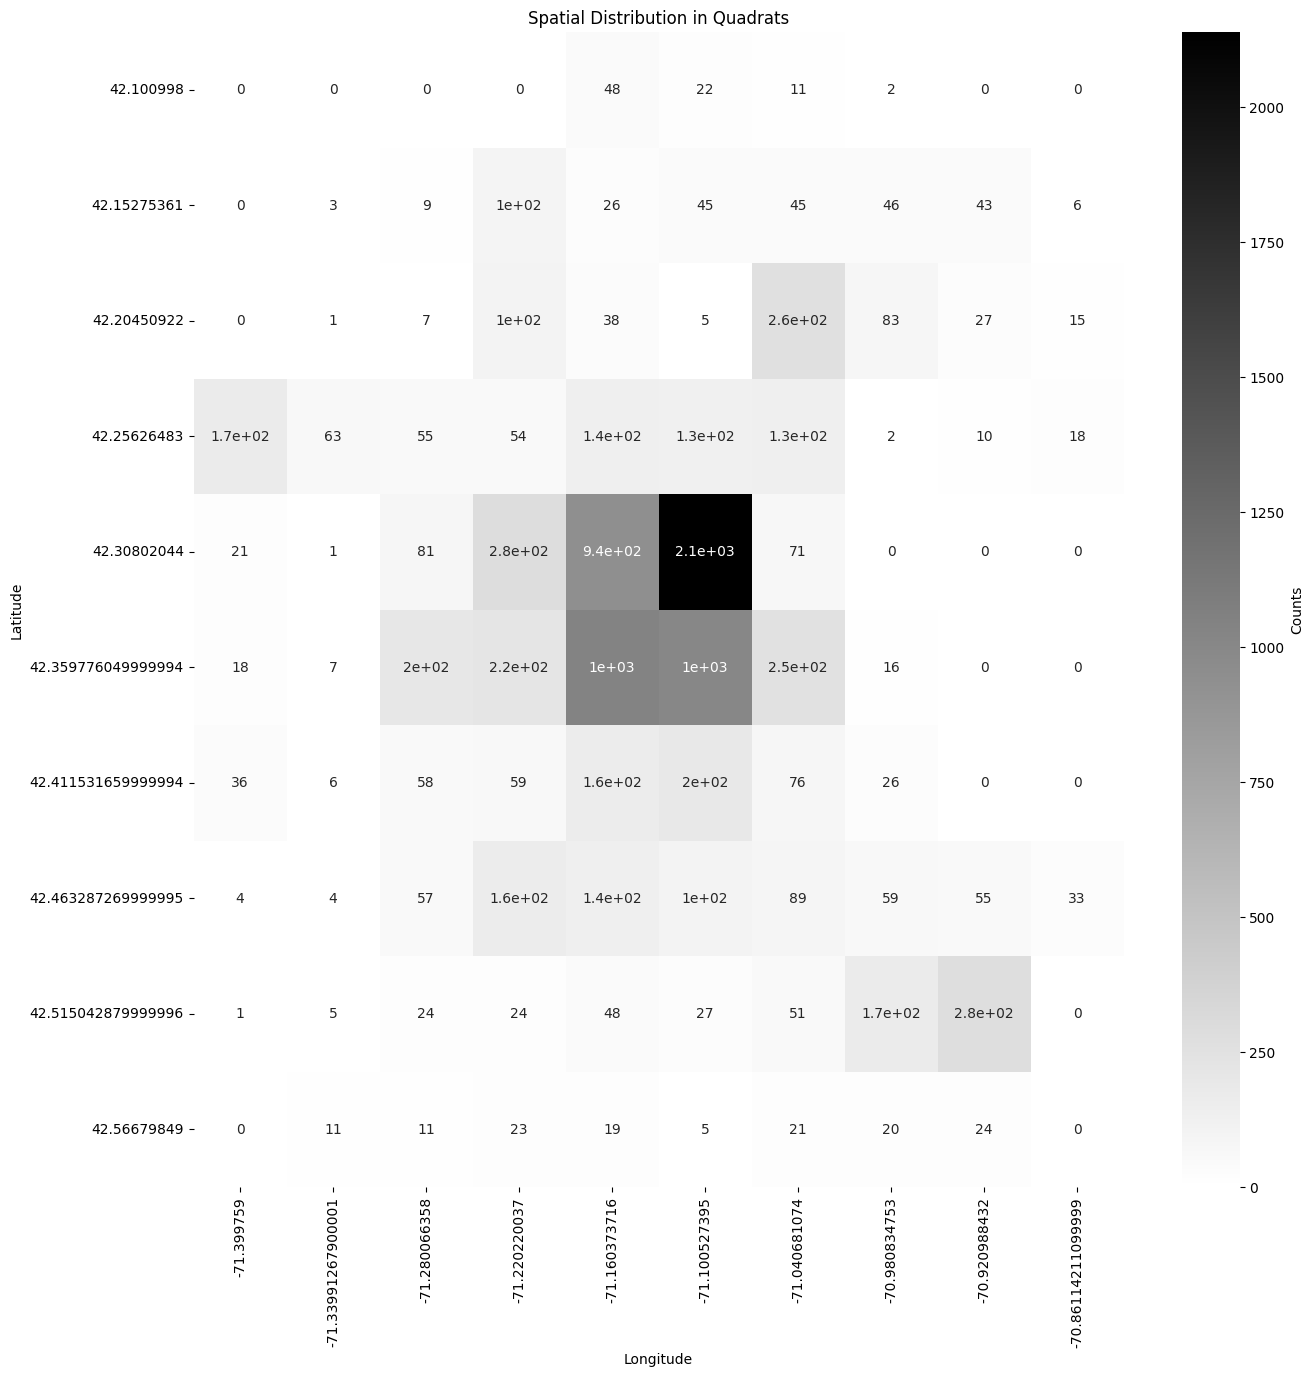

In [48]:
# Heatmap with all businesses
quadrat_counts, latitude_edges, longitude_edges = np.histogram2d(
    data['latitude'], data['longitude'], bins=[num_quadrats_x, num_quadrats_y]
)

# Convert counts to DataFrame for easier analysis
quadrat_df = pd.DataFrame(quadrat_counts, columns=longitude_edges[:-1], index=latitude_edges[:-1])

plt.figure(figsize=(15, 15))

# Visualize spatial distribution using a heatmap
sns.heatmap(quadrat_df, annot=True, cmap='binary', cbar_kws={'label': 'Counts'})
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Spatial Distribution in Quadrats')
plt.show()


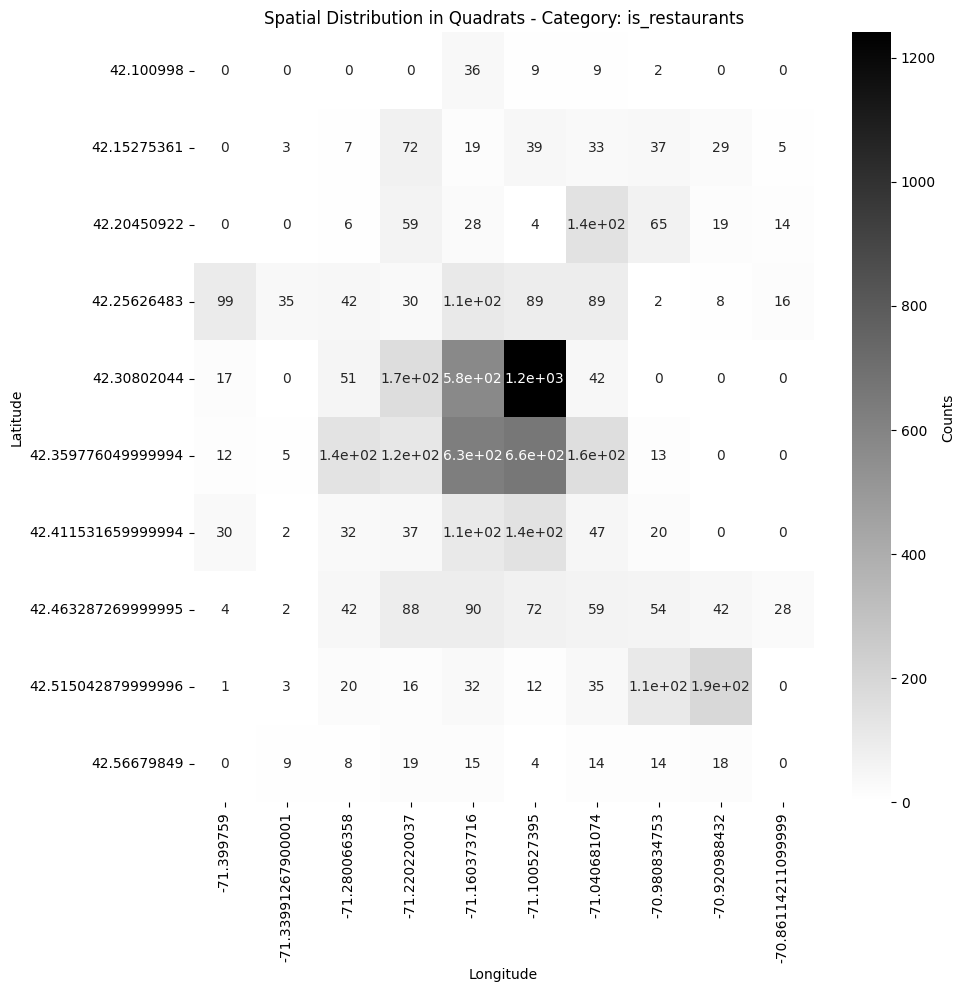

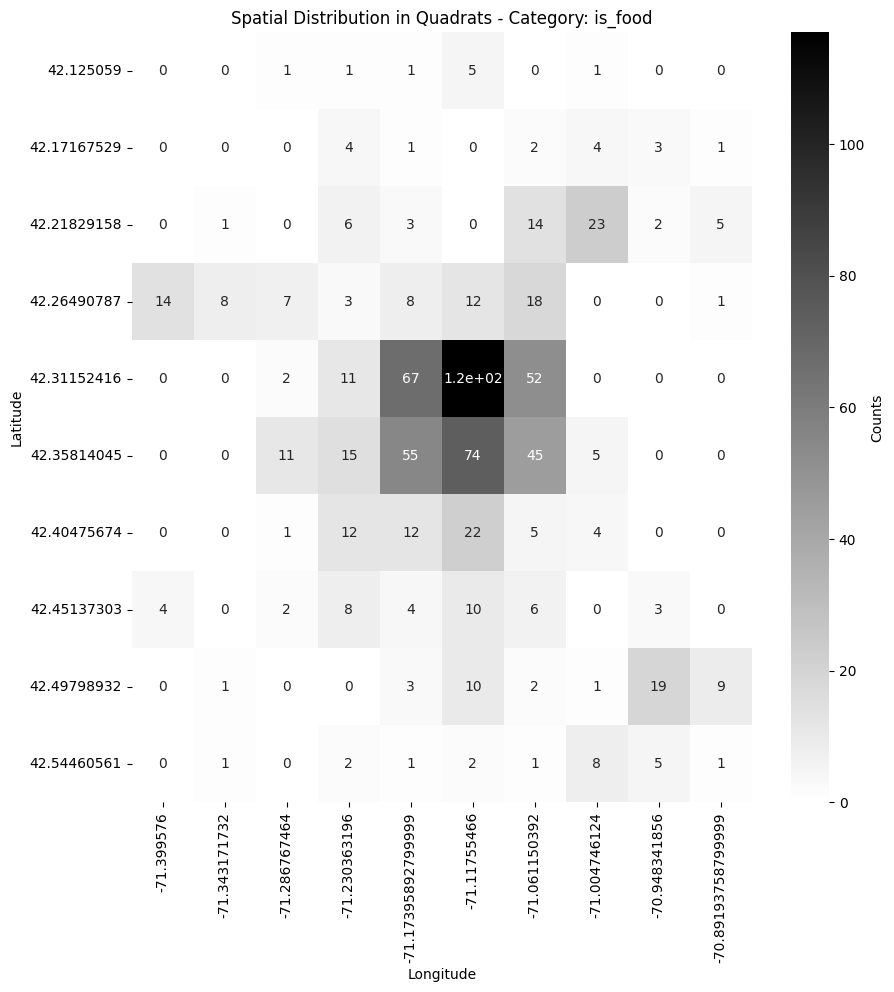

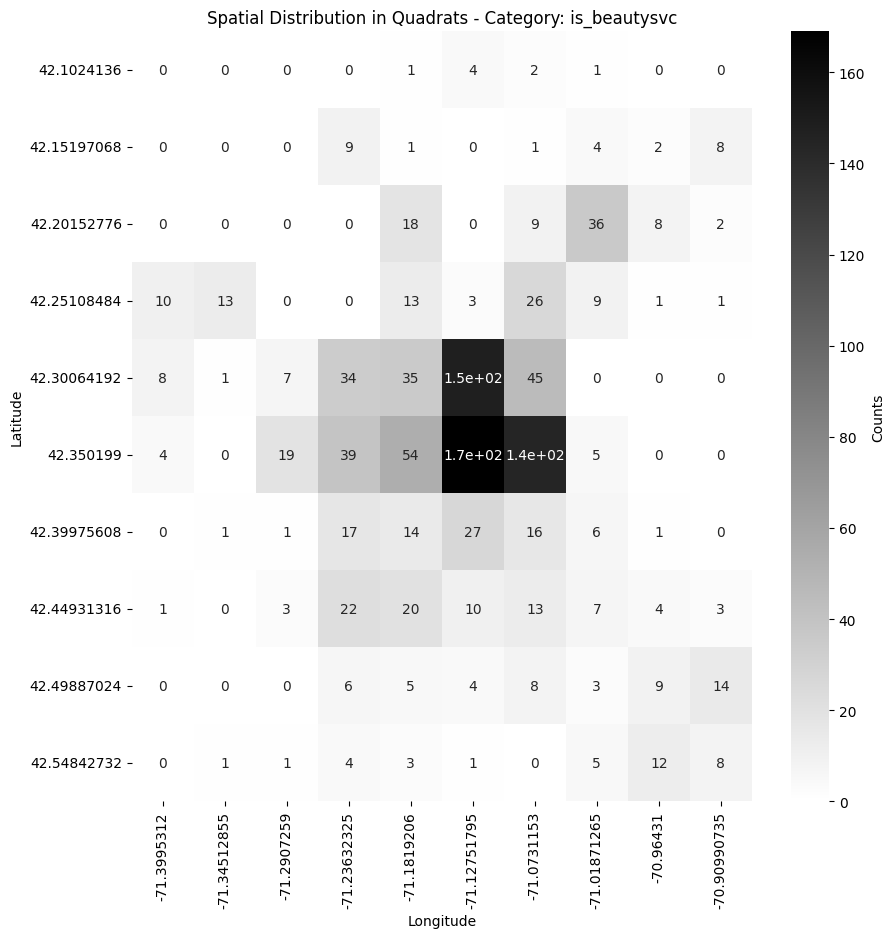

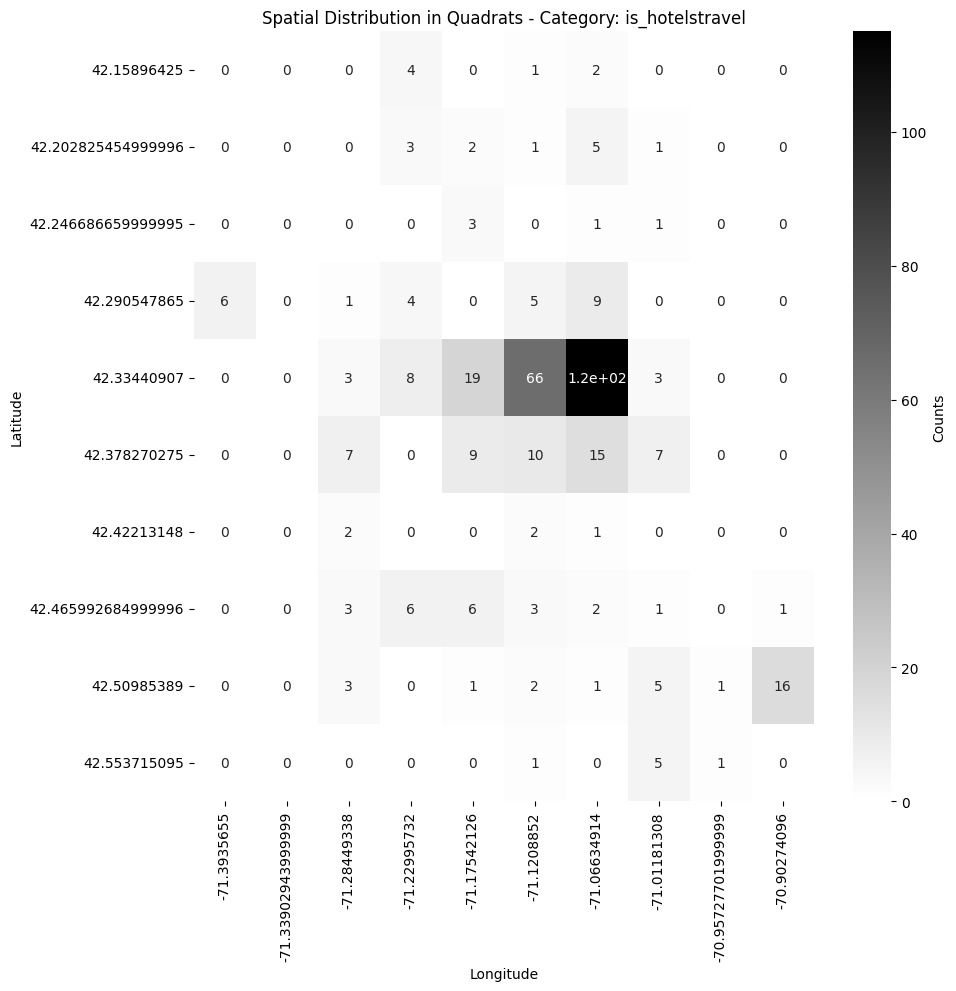

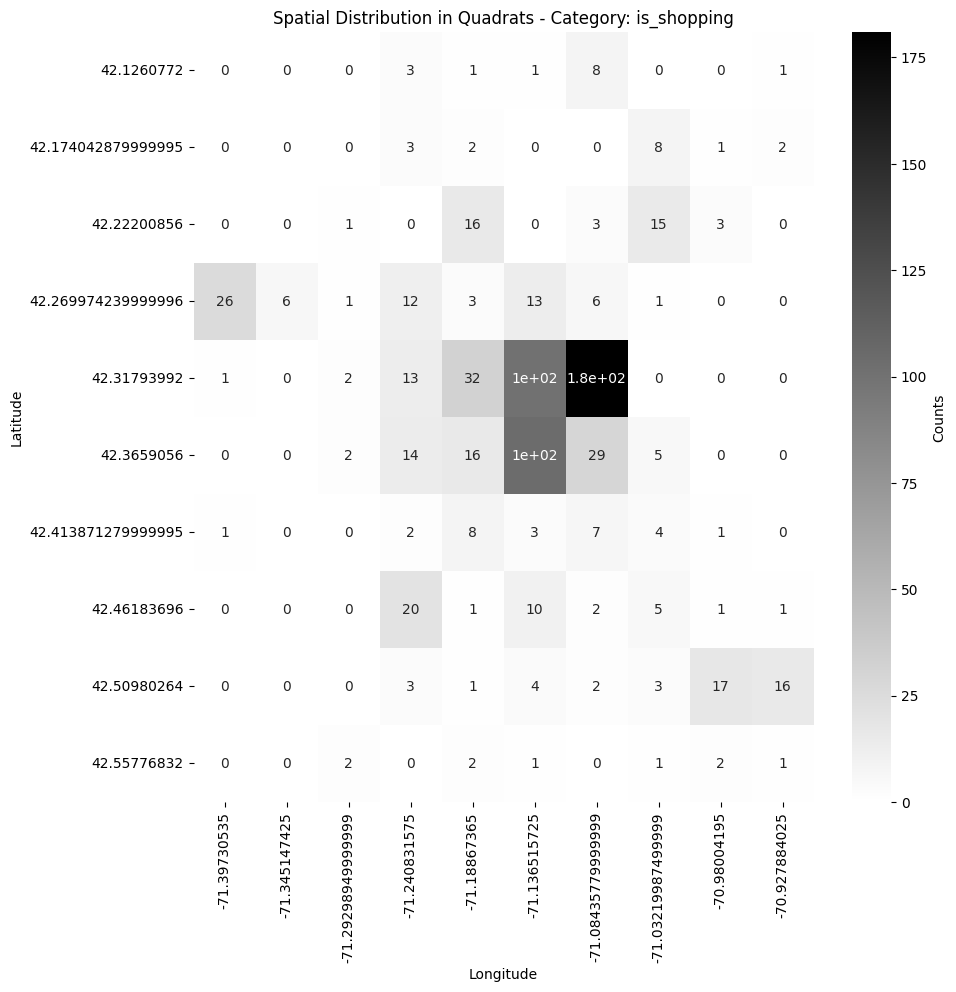

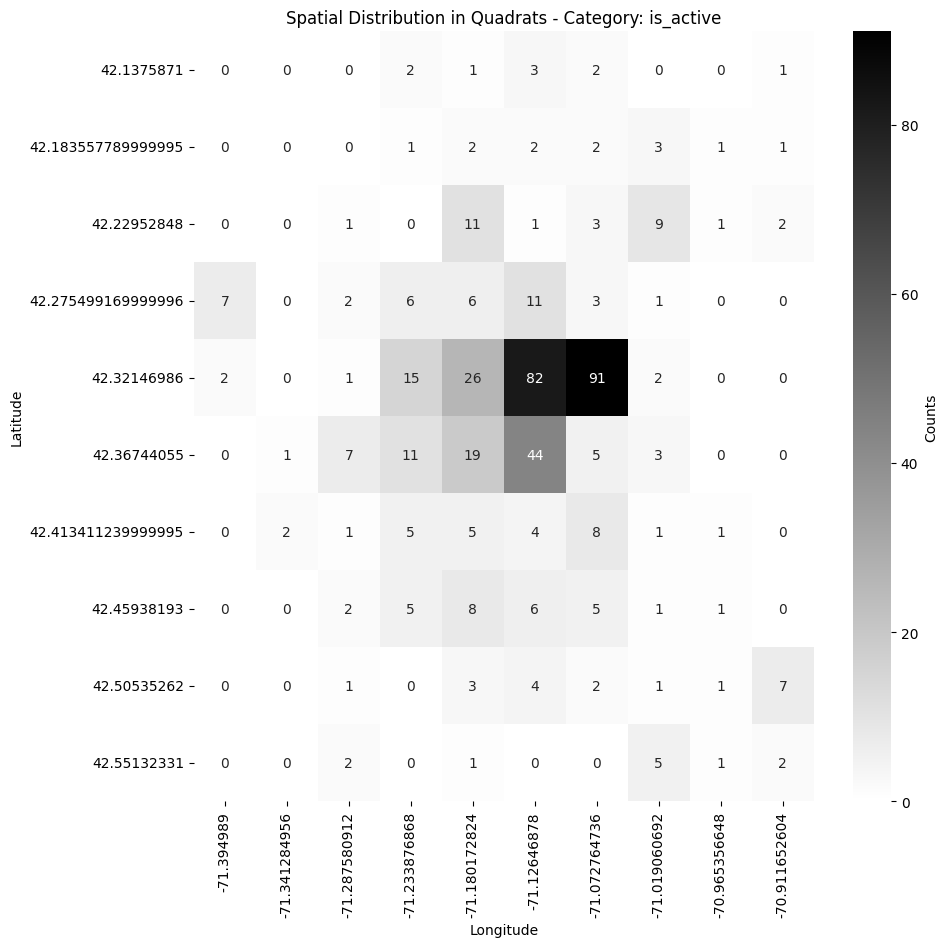

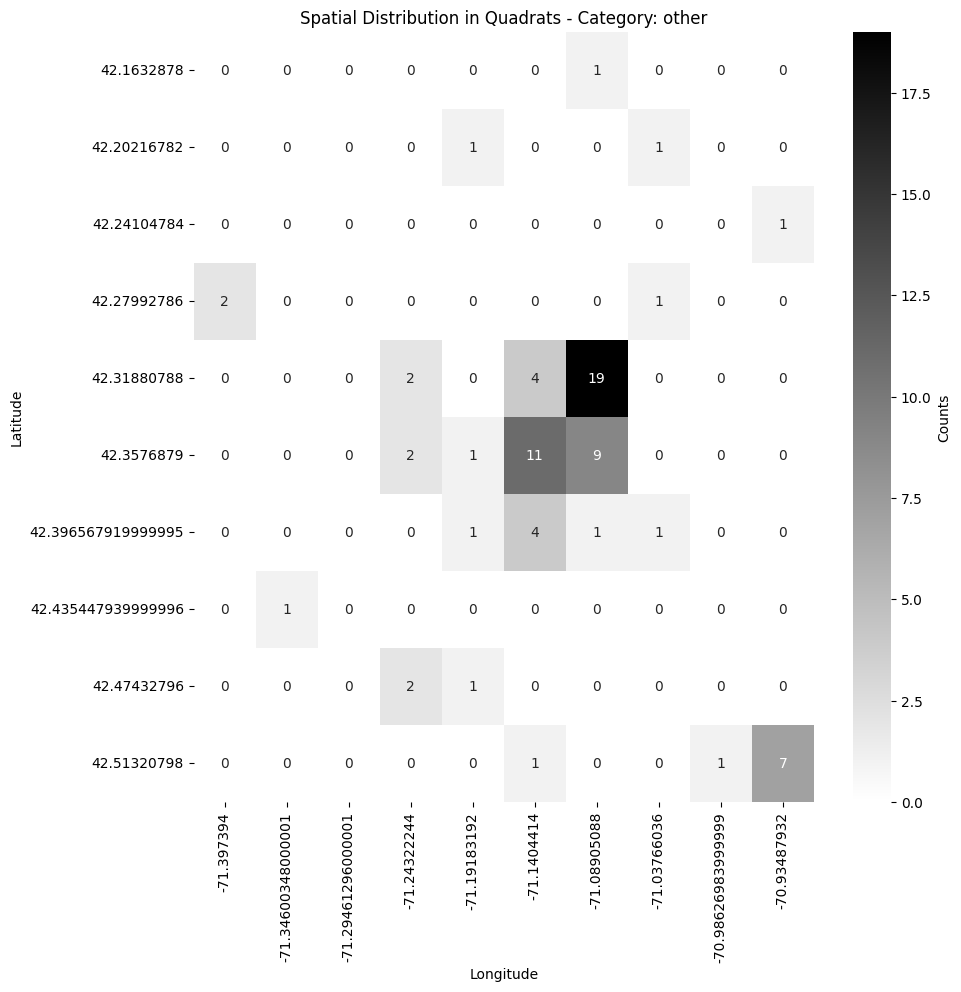

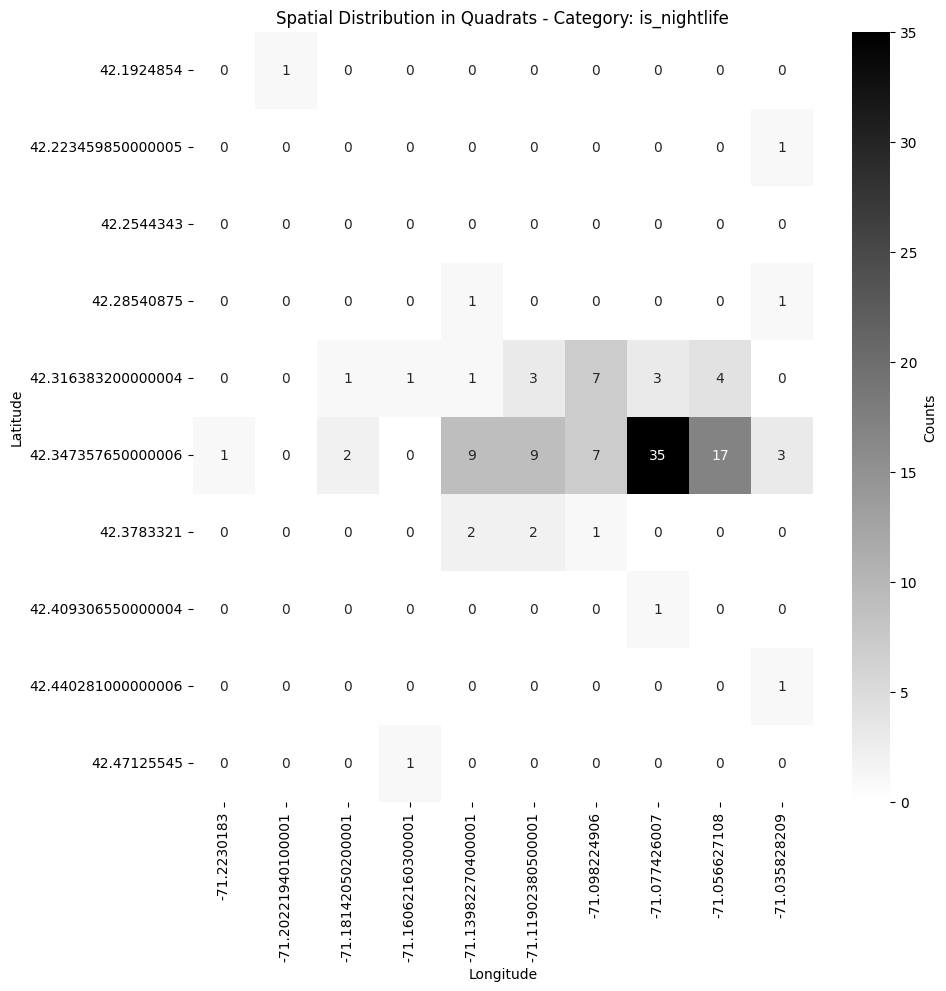

In [43]:
# By Business Category

# Define the number of quadrats
num_quadrats_x = 10
num_quadrats_y = 10

# Iterate over each unique value in 'category'
for category in data['category'].unique():
    # Filter DataFrame for the current category
    df_category = data[data['category'] == category]

    # Perform quadrat analysis for the current category
    quadrat_counts, latitude_edges, longitude_edges = np.histogram2d(
        df_category['latitude'], df_category['longitude'], bins=[num_quadrats_x, num_quadrats_y]
    )

    # Convert counts to DataFrame for easier analysis
    quadrat_df = pd.DataFrame(quadrat_counts, columns=longitude_edges[:-1], index=latitude_edges[:-1])

    # Set figure size
    plt.figure(figsize=(10, 10))

    # Visualize spatial distribution using a heatmap
    sns.heatmap(quadrat_df, annot=True, cmap='binary', cbar_kws={'label': 'Counts'})
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.title(f'Spatial Distribution in Quadrats - Category: {category}')
    plt.show()


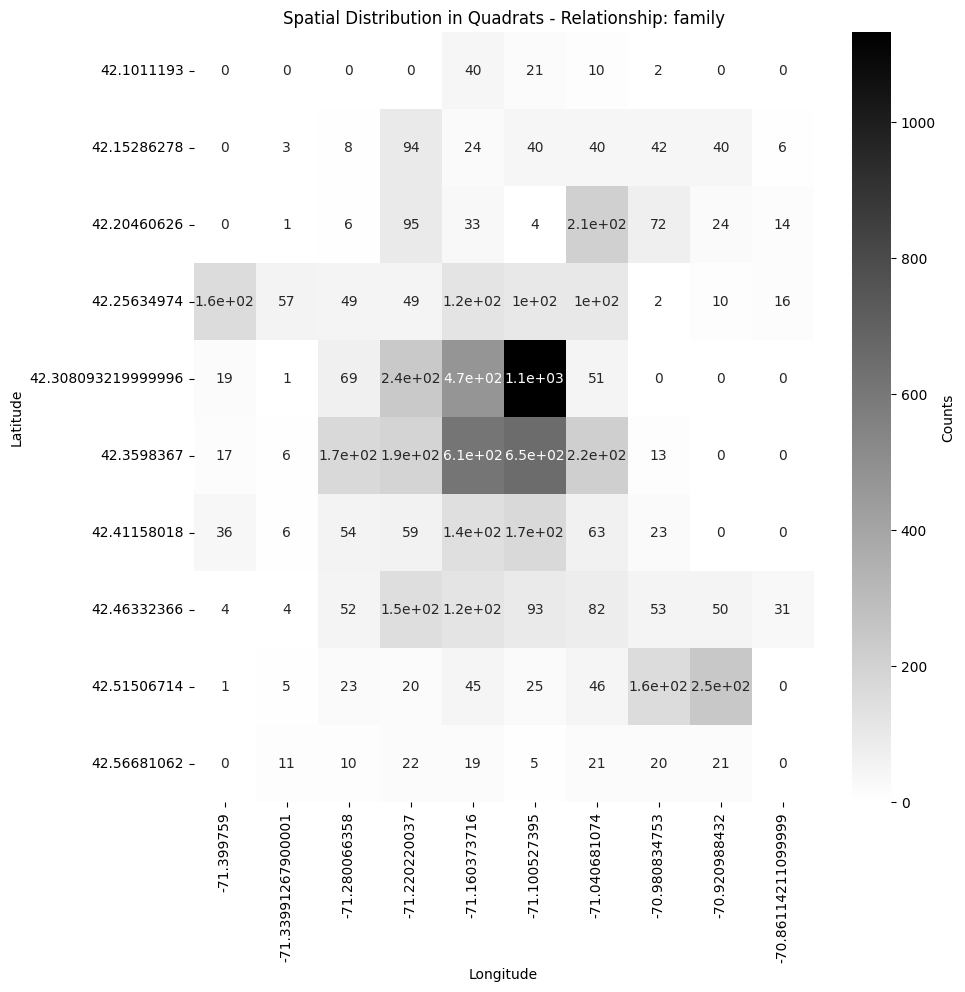

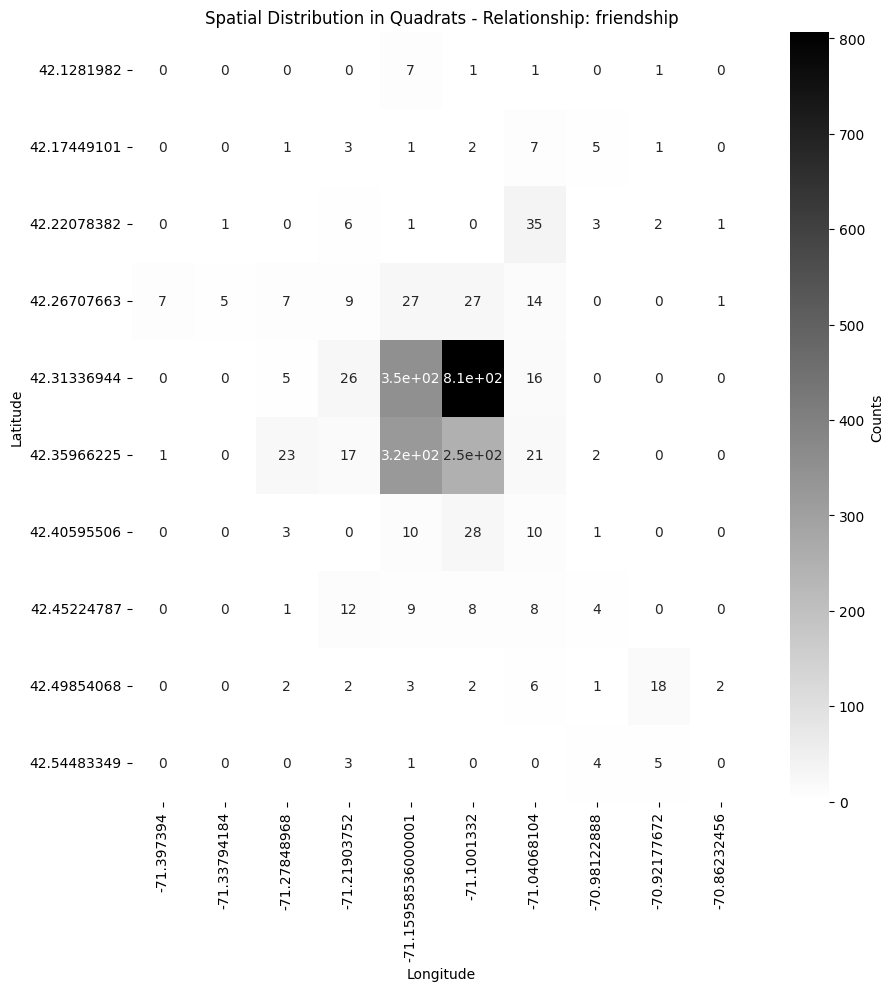

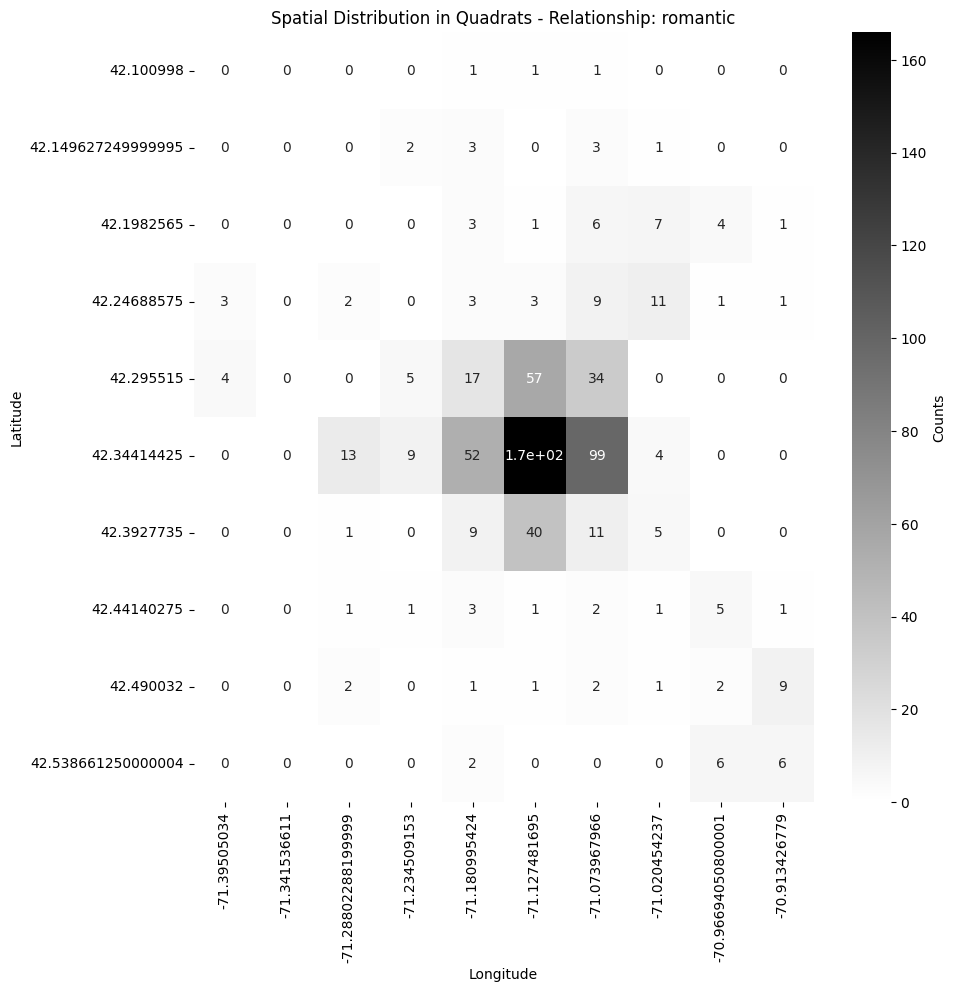

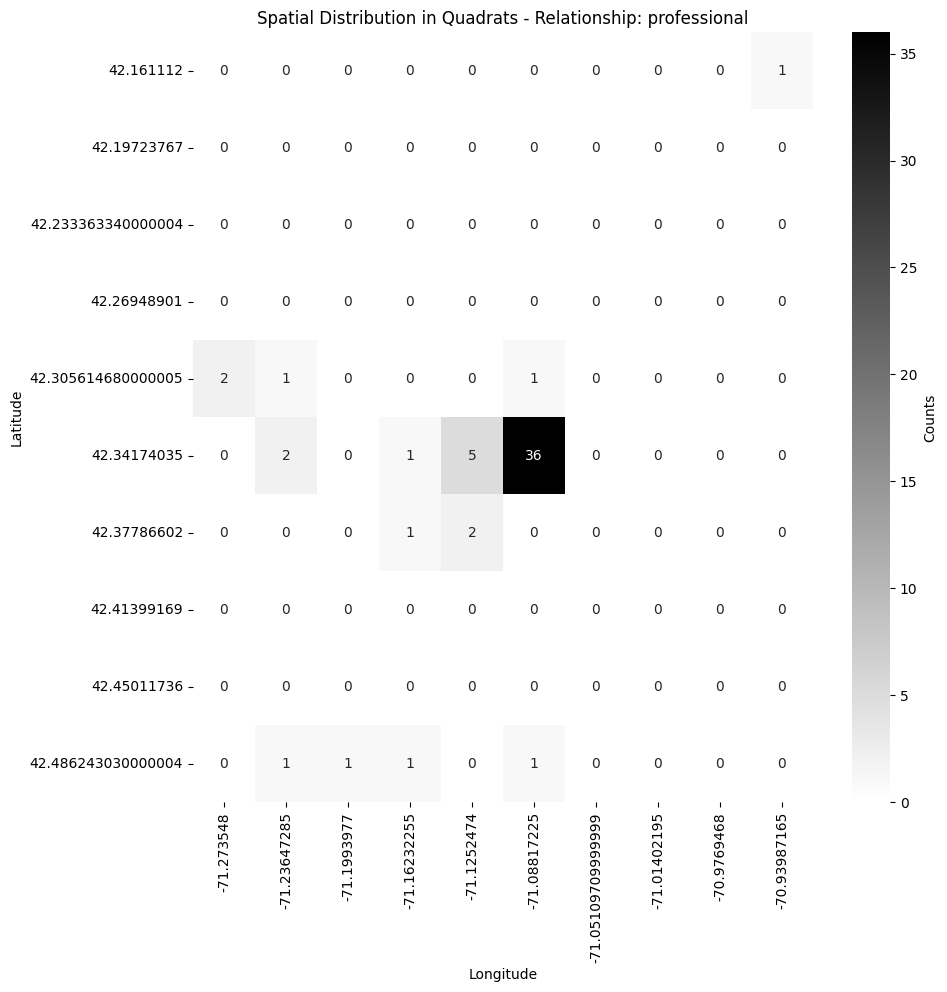

In [45]:
# By Relationship Type

# Define the number of quadrats
num_quadrats_x = 10
num_quadrats_y = 10

# Iterate over each unique value in 'relationship
for relationship in data['relationship'].unique():
    # Filter DataFrame for the current relationship
    df_relationship = data[data['relationship'] == relationship]

    # Perform quadrat analysis for the current relationship
    quadrat_counts, latitude_edges, longitude_edges = np.histogram2d(
        df_relationship['latitude'], df_relationship['longitude'], bins=[num_quadrats_x, num_quadrats_y]
    )

    # Convert counts to DataFrame for easier analysis
    quadrat_df = pd.DataFrame(quadrat_counts, columns=longitude_edges[:-1], index=latitude_edges[:-1])

    # Set figure size
    plt.figure(figsize=(10, 10))

    # Visualize spatial distribution using a heatmap
    sns.heatmap(quadrat_df, annot=True, cmap='binary', cbar_kws={'label': 'Counts'})
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.title(f'Spatial Distribution in Quadrats - Relationship: {relationship}')
    plt.show()